In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [70]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

train.shape, test.shape, sub.shape

((891, 12), (418, 11), (418, 2))

In [71]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [72]:
outlier_dat = train.loc[train['Fare'] >= 400, : ]
outlier_dat

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

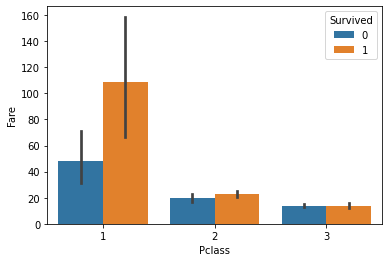

In [73]:
### Cabin이 값이 없는 친구들의 Pclass는 어떠할까?
Cabin_Na = train.loc[train['Cabin'].isna(), :]
sns.barplot(x='Pclass', y='Fare', hue='Survived', data=Cabin_Na)

In [74]:
## FamilySize = Parch + SibSp + 1
train['FamilySize'] = train['Parch'] + train['SibSp'] + 1
test['FamilySize'] = test['Parch'] + test['SibSp'] + 1

In [75]:
train.shape, test.shape

((891, 13), (418, 12))

In [76]:
all_df = pd.concat( [train, test], join='inner', ignore_index=True)

all_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1


In [77]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  FamilySize   1309 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [78]:
### 결측치 처리 (요금-Fare), 정박항(Embarked)
all_df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [79]:
all_df['Embarked'] = all_df['Embarked'].fillna('S')
all_df['Fare'] = all_df['Fare'].fillna( all_df.Fare.mean() )

all_df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
FamilySize        0
dtype: int64

In [81]:
all_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize'],
      dtype='object')

### 실습 3-2 Name을 이용해서 Title 특징 만들고, Cabin_bool 만들기

In [82]:
all_df['Title'] = all_df.Name.str.extract(" ([A-Za-z]+)\.", expand=False)
all_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [83]:
all_df['Title'] = all_df['Title'].replace(['Don', 'Rev', 'Dr', 'Major', 'Lady','Sir',
                                              'Col', 'Capt', 'Countess', 'Jonkheer', 'Dona'], "Rare")
all_df['Title'] = all_df['Title'].replace('Mme', "Mrs")
all_df['Title'] = all_df['Title'].replace('Mlle',"Miss")
all_df['Title'] = all_df['Title'].replace('Ms', "Miss")

In [84]:
all_df['Title'].value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: Title, dtype: int64

In [85]:
all_df.loc[all_df['Cabin'].isna(), "Cabin_bool"] = 1 
all_df.loc[~all_df['Cabin'].isna(), "Cabin_bool"] = 0 
all_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Cabin_bool
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs,0.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs,0.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr,1.0


### 실습 3-3 LabelEncoding해보기

In [86]:
# sex, Title, Embarked
sex_dic = {"male":0, "female":1}
all_df['Sex'] = all_df['Sex'].map(sex_dic)

Title_dic = {"Mr":0, "Mrs":1, "Miss":2, "Master":3, "Rare":4}
all_df['Title'] = all_df['Title'].map(Title_dic)

Em_dic = {"S":0, "C":1, "Q":2}
all_df['Embarked'] = all_df['Embarked'].map(Em_dic)

all_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Cabin_bool
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,1,0.0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,2,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,1,0.0
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,0,1.0


In [87]:
all_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [88]:
all_df.loc[ all_df['Cabin'].isna(), 'Cabin_First'] = 'Z'
all_df.loc[ all_df['Cabin'].notna(), 'Cabin_First'] = all_df['Cabin'].str.slice(0,1)
print( all_df.Cabin_First.value_counts() )

all_df.head(2)

Z    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin_First, dtype: int64


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Cabin_bool,Cabin_First
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,1.0,Z
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,1,0.0,C


<AxesSubplot:ylabel='Cabin_First'>

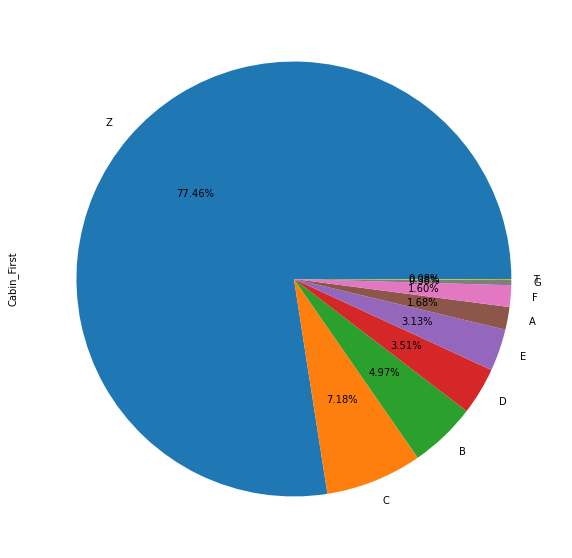

In [89]:
tmp = all_df['Cabin_First'].value_counts()
tmp.plot(kind='pie', autopct='%1.2f%%', figsize=(15,10))

In [90]:
all_df['Cabin_First'] = all_df['Cabin_First'].replace(['G','T'],"Rare")
print(all_df['Cabin_First'].unique())
Cabin_First_dic = {"A":0, "B":1, "C":2, "D":3, "E":4, "F":5, "Z":6, "Rare":7}
all_df['Cabin_First'] = all_df['Cabin_First'].map(Cabin_First_dic)
print(all_df['Cabin_First'].unique())
all_df.head()

['Z' 'C' 'E' 'Rare' 'D' 'A' 'B' 'F']
[6 2 4 7 3 0 1 5]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Cabin_bool,Cabin_First
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,1.0,6
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,1,0.0,2
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,2,1.0,6
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,1,0.0,2
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,0,1.0,6


In [91]:
all_df['Cabin_First'].unique()

array([6, 2, 4, 7, 3, 0, 1, 5])

In [92]:
all_df.Title.value_counts()

0    757
2    264
1    198
3     61
4     29
Name: Title, dtype: int64

In [93]:
mean_gr = all_df.groupby('Title').mean()['Age']
print(mean_gr[1])
mean_gr

36.91812865497076


Title
0    32.252151
1    36.918129
2    21.824366
3     5.482642
4    45.178571
Name: Age, dtype: float64

In [94]:
# Title_dic = {"Mr":0, "Mrs":1, "Miss":2, "Master":3, "Rare":4}

# Mr Age 평균 처리 
all_df.loc[ (all_df['Age'].isna() ) & (all_df['Title']==0), 'Age'] = mean_gr[0]
all_df.loc[ (all_df['Age'].isna() ) & (all_df['Title']==1), 'Age'] = mean_gr[1]
all_df.loc[ (all_df['Age'].isna() ) & (all_df['Title']==2), 'Age'] = mean_gr[2]
all_df.loc[ (all_df['Age'].isna() ) & (all_df['Title']==3), 'Age'] = mean_gr[3]
all_df.loc[ (all_df['Age'].isna() ) & (all_df['Title']==4), 'Age'] = mean_gr[4]

In [95]:
all_df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
FamilySize        0
Title             0
Cabin_bool        0
Cabin_First       0
dtype: int64

In [96]:
## Fare에 qcut
all_df['Fare_qcut'] = pd.qcut(all_df['Fare'], 5, labels=False)
all_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Cabin_bool,Cabin_First,Fare_qcut
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,1.0,6,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,1,0.0,2,4
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,2,1.0,6,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,1,0.0,2,4
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,0,1.0,6,1


In [97]:
### train, test를 나누고, train에 survived를 붙여주기
print(train.shape, test.shape)

train_df = all_df.iloc[0:891, :]
test_df = all_df.iloc[891:, :]
train_df.shape, test_df.shape

(891, 13) (418, 12)


((891, 16), (418, 16))

In [98]:
# train_df = pd.concat([train_df, train['Survived'] ], axis=1)
train_df['Survived'] = train['Survived']
train_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Cabin_bool,Cabin_First,Fare_qcut,Survived
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,1.0,6,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,1,0.0,2,4,1
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,2,1.0,6,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,1,0.0,2,4,1
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,0,1.0,6,1,0


In [99]:
train_df.corr()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,Cabin_bool,Cabin_First,Fare_qcut,Survived
PassengerId,1.000000,-0.035144,-0.042939,0.042156,-0.057527,-0.001652,0.012658,-0.030467,-0.040143,-0.025145,-0.019919,-0.037825,-0.005353,-0.005007
Pclass,-0.035144,1.000000,-0.131900,-0.344413,0.083081,0.018443,-0.549500,0.045702,0.065997,-0.120491,0.725541,0.734341,-0.705483,-0.338481
Sex,-0.042939,-0.131900,1.000000,-0.114705,0.114631,0.245489,0.182333,0.116569,0.200988,0.564438,-0.140391,-0.106627,0.244795,0.543351
Age,0.042156,-0.344413,-0.114705,1.000000,-0.266588,-0.196276,0.091862,-0.016031,-0.280260,-0.292198,-0.235683,-0.256016,0.110949,-0.087227
SibSp,-0.057527,0.083081,0.114631,-0.266588,1.000000,0.414838,0.159651,-0.059961,0.890712,0.269474,0.040460,0.040631,0.355529,-0.035322
Parch,-0.001652,0.018443,0.245489,-0.196276,0.414838,1.000000,0.216225,-0.078665,0.783111,0.267818,-0.036987,-0.026340,0.348096,0.081629
Fare,0.012658,-0.549500,0.182333,0.091862,0.159651,0.216225,1.000000,0.062142,0.217138,0.140745,-0.482075,-0.526996,0.602355,0.257307
Embarked,-0.030467,0.045702,0.116569,-0.016031,-0.059961,-0.078665,0.062142,1.000000,-0.080281,0.120082,-0.013774,-0.045830,-0.092629,0.106811
FamilySize,-0.040143,0.065997,0.200988,-0.280260,0.890712,0.783111,0.217138,-0.080281,1.000000,0.317974,0.009175,0.014611,0.416895,0.016639
Title,-0.025145,-0.120491,0.564438,-0.292198,0.269474,0.267818,0.140745,0.120082,0.317974,1.000000,-0.104024,-0.101087,0.257521,0.405921


In [100]:
train_df.isnull().sum(), test_df.isnull().sum()

(PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         0
 FamilySize       0
 Title            0
 Cabin_bool       0
 Cabin_First      0
 Fare_qcut        0
 Survived         0
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          327
 Embarked         0
 FamilySize       0
 Title            0
 Cabin_bool       0
 Cabin_First      0
 Fare_qcut        0
 dtype: int64)

In [65]:
sel = ['Pclass', 'Sex', 'Fare_qcut', 'Embarked', 'Title', 'Cabin_bool', 'Cabin_First']

# 학습에 사용될 데이터 준비 X_train, y_train
X_train = train_df[sel]
y_train = train_df['Survived']
X_test = test_df[sel]

In [101]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

sub['Survived'] = pred
sub.to_csv("first0706_rf01.csv", index=False)

In [ ]:
### 특징(feature) 생성 아이디어 2. FamilySize가 5이상인 경우는 거의 사망률이 높다.(전영역)
### 특징(feature) 생성 아이디어 4. 1등급인데, Parch값이 4인 친구들은 사망률이 높다.

### 특징(feature) 생성 아이디어 1. 3등급인데, 나이가 40-50대 다 사망.
### 특징(feature) 생성 아이디어 3. 2등급의 남성이 많이 사망률이ㅁ 높다.
   #* 왜? ---
### 특징(feature) 생성 아이디어 5. Pclass가 2-3등급은 전연령대에 걸쳐 남성은 사망률이 높다.